# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [142]:
#Import all the necessary modules
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [116]:
pima_df = pd.read_csv('pima-indians-diabetes+(3).csv')
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



PregnanciesNumber of times pregnant
GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressureDiastolic blood pressure (mm Hg)
SkinThicknessTriceps skin fold thickness (mm)
Insulin2-Hour serum insulin (mu U/ml)
BMIBody mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunctionDiabetes pedigree function
AgeAge (years)
OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [117]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [118]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [119]:
pima_df.shape

(768, 9)

In [120]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [121]:
pima_df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [122]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [123]:
pima_df.tail(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [124]:
#Check for 0 values
(pima_df.Plas==0).any()
for col in pima_df.columns:
    print((pima_df[col]==0).any())
    #print(pima_df[col].value_counts())


True
True
True
True
True
True
False
False
True


In [125]:
pima_df.median()

Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [126]:
#'Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'

In [127]:
x_pima_df = pima_df.drop(['Preg','pedi','class'],axis=1)
x_pima_df.head(2)

,Plas,Pres,skin,test,mass,age
0,148,72,35,0,33.6,50
1,85,66,29,0,26.6,31


In [128]:
y_pima_df = pima_df['class']

In [129]:
x_pima_df = x_pima_df_median.replace(0,x_pima_df.median())

In [130]:
x_pima_df.median()

Plas    117.00
Pres     72.00
skin     23.00
test     31.25
mass     32.00
age      29.00
dtype: float64

In [131]:
x_pima_df['Preg'] = pima_df['Preg']
x_pima_df['pedi'] = pima_df['pedi']

In [132]:
x_pima_df.head()

,Plas,Pres,skin,test,mass,age,Preg,pedi
0,148,72,35,30.5,33.6,50,6,0.627
1,85,66,29,30.5,26.6,31,1,0.351
2,183,64,23,30.5,23.3,32,8,0.672
3,89,66,23,94.0,28.1,21,1,0.167
4,137,40,35,168.0,43.1,33,0,2.288


# Q5 Print the descriptive statistics of each & every column using describe() function

In [133]:
x_pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42


In [140]:
pima_df.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

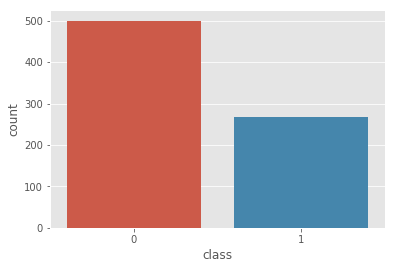

In [134]:
sns.countplot(x='class', data=pima_df)

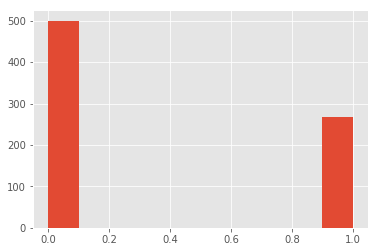

In [135]:
pima_df['class'].hist()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [136]:
pima_df_updated = x_pima_df
pima_df_updated['class'] = pima_df['class']
pima_df_updated.head(2)

,Plas,Pres,skin,test,mass,age,Preg,pedi,class
0,148,72,35,30.5,33.6,50,6,0.627,1
1,85,66,29,30.5,26.6,31,1,0.351,0


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


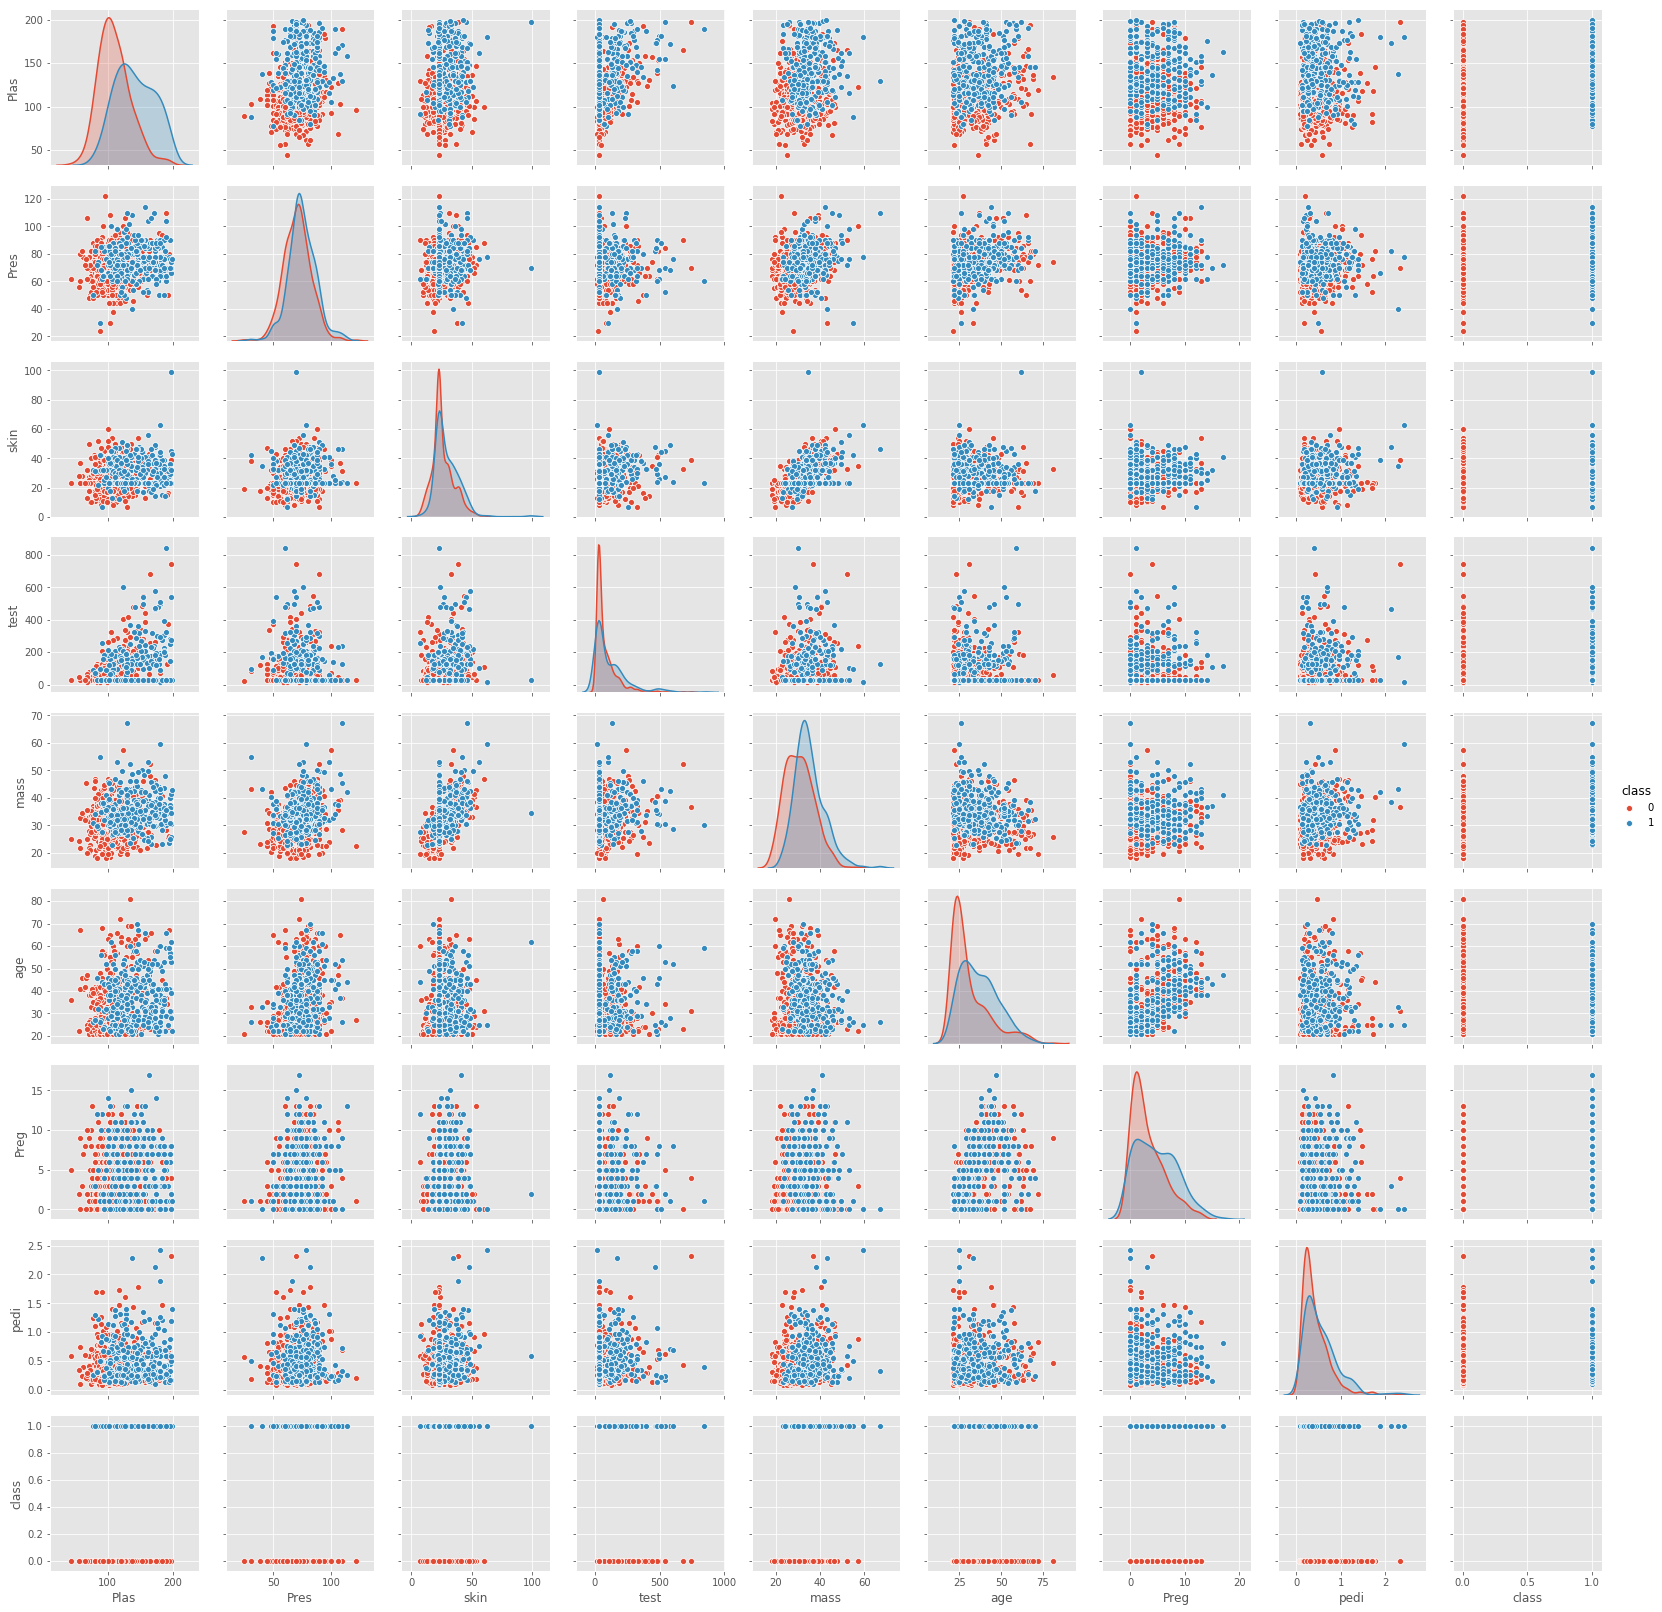

In [167]:
sns.pairplot(pima_df_updated,hue='class')

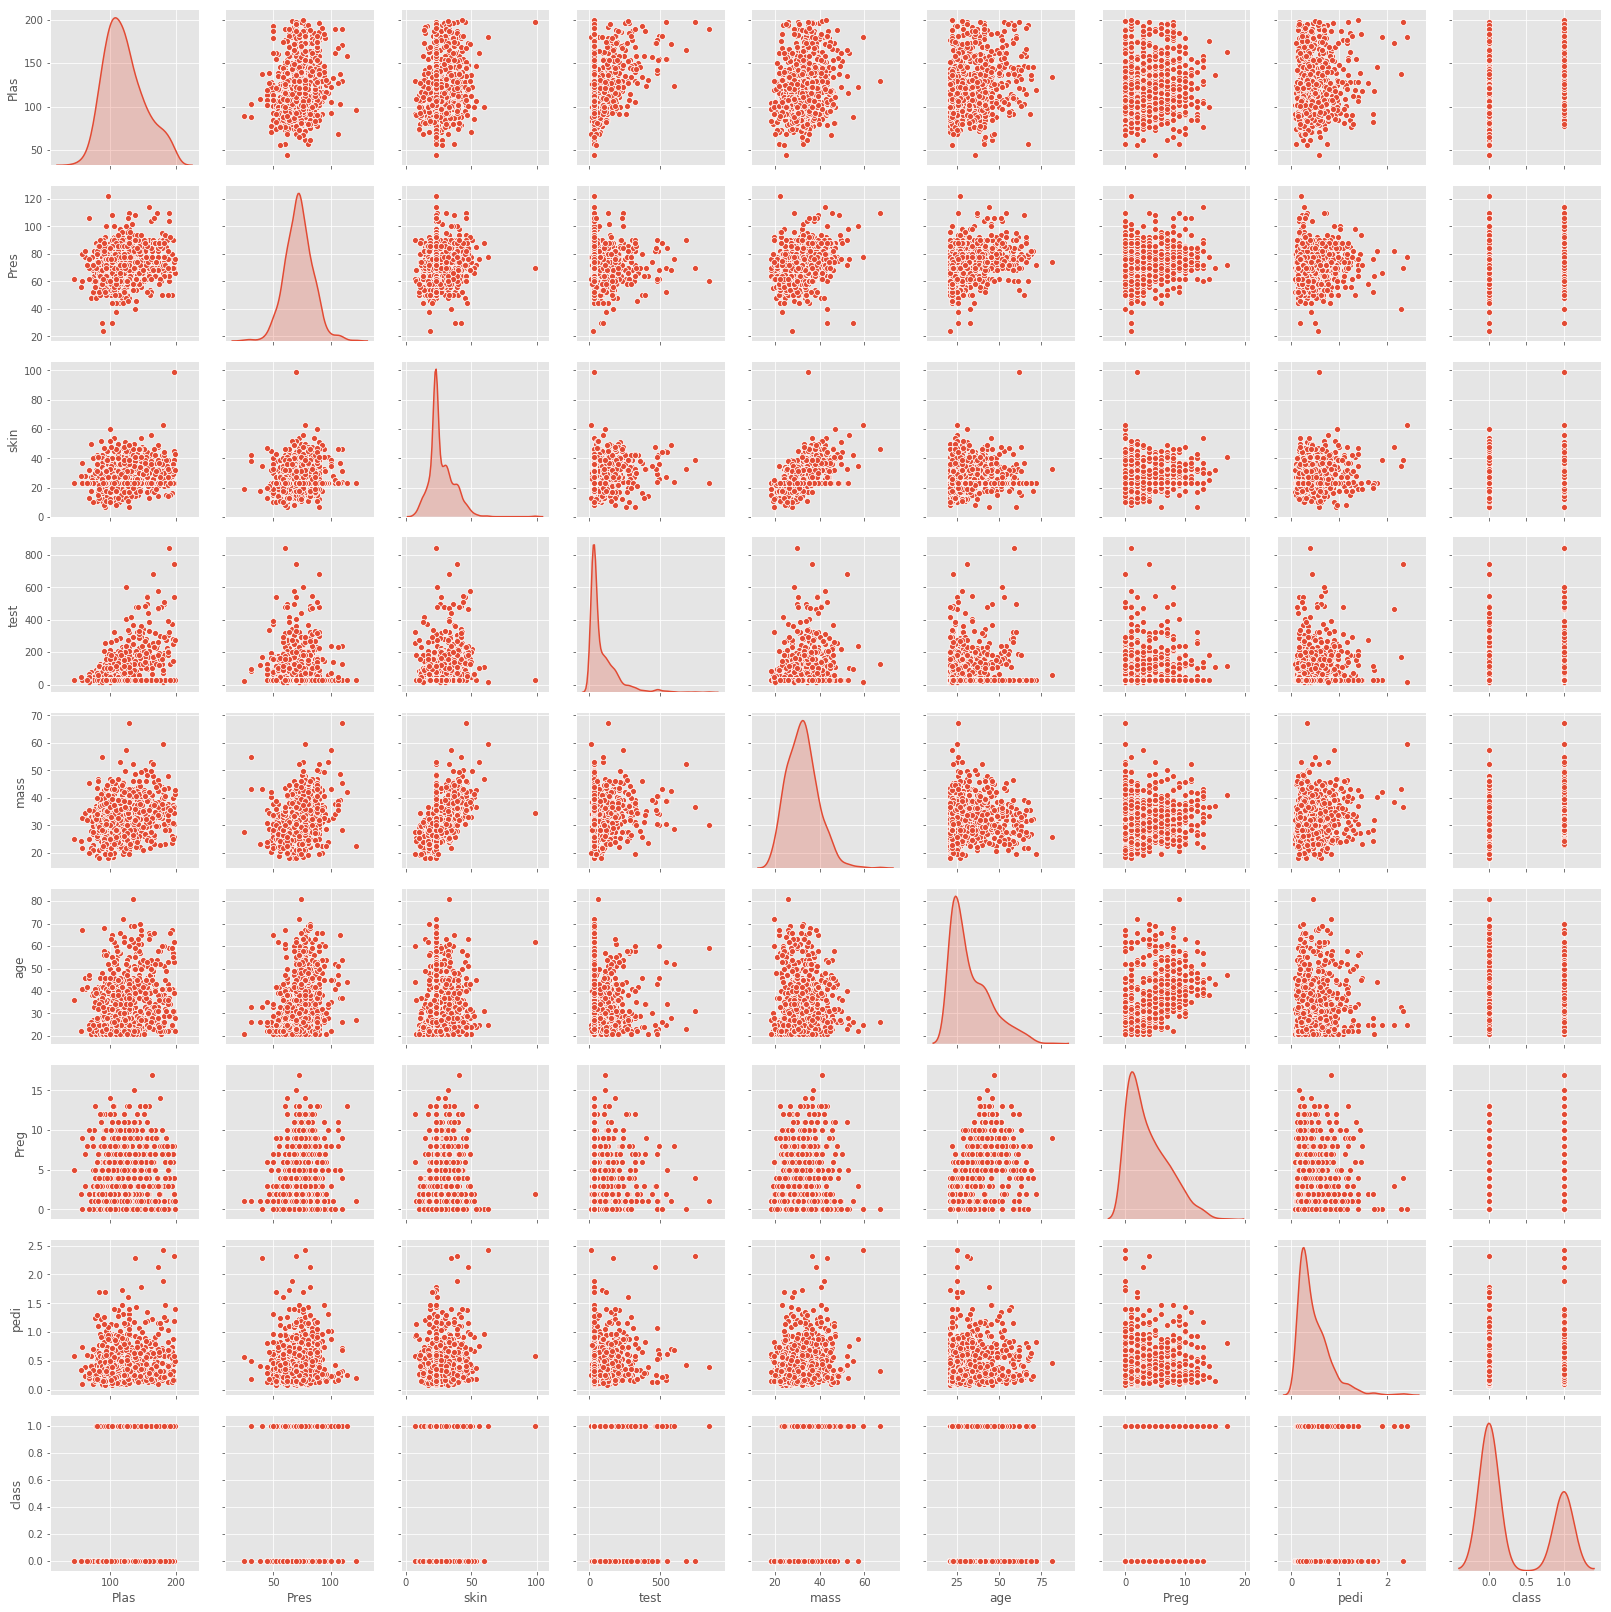

In [195]:
sns.pairplot(pima_df_updated, diag_kind='kde')

## class 0 - Red
## class 1 - Blue

In [193]:
# Plasma is highly correlated among other columns with corr = 0.49
# mass has a correlation of 0.31 with increase in mass will increase chances of diabeties
# with increase in age chances of diabeties increases


In [137]:
pima_df_updated.corr()

,Plas,Pres,skin,test,mass,age,Preg,pedi,class
Plas,1.000000,0.218937,0.172143,0.357573,0.231400,0.266909,0.128213,0.137327,0.492782
Pres,0.218937,1.000000,0.147809,-0.028721,0.281132,0.324915,0.208615,-0.002378,0.165723
skin,0.172143,0.147809,1.000000,0.238188,0.546951,0.054514,0.032568,0.142977,0.189065
test,0.357573,-0.028721,0.238188,1.000000,0.189022,-0.015413,-0.055697,0.178029,0.148457
mass,0.231400,0.281132,0.546951,0.189022,1.000000,0.025744,0.021546,0.153506,0.312249
age,0.266909,0.324915,0.054514,-0.015413,0.025744,1.000000,0.544341,0.033561,0.238356
Preg,0.128213,0.208615,0.032568,-0.055697,0.021546,0.544341,1.000000,-0.033523,0.221898
pedi,0.137327,-0.002378,0.142977,0.178029,0.153506,0.033561,-0.033523,1.000000,0.173844
class,0.492782,0.165723,0.189065,0.148457,0.312249,0.238356,0.221898,0.173844,1.000000


In [141]:
pima_df_updated.groupby(["class"]).count()

,Plas,Pres,skin,test,mass,age,Preg,pedi
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [139]:
Xpima_df= pima_df_updated.drop('class',axis=1)
Ypima_df = pima_df_updated['class']
x_train, x_test, y_train, y_test = model_selection.train_test_split(Xpima_df, Ypima_df, test_size=0.3, random_state=0)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [144]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [149]:
y_predict = dt_model.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[130  27]
 [ 33  41]]


In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7402597402597403

In [152]:
dt_model.score(x_test , y_test)

0.7402597402597403

## Model 2

In [158]:
dt_model_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )
dt_model_2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [159]:
dt_model_2.score(x_test , y_test)

0.7792207792207793

In [164]:
y_predict = dt_model_2.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[135  22]
 [ 29  45]]


Print the feature importance of the decision model - Optional

In [179]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']

pima_Tree_File = open('C:\\Users\\subha\\subhav\\pima_tree.dot',"w")
dot_data = tree.export_graphviz(dt_model_2, out_file=pima_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

pima_Tree_File.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))



           Imp
Plas  0.294275
Pres  0.066631
skin  0.024743
test  0.025106
mass  0.201871
age   0.147683
Preg  0.109646
pedi  0.130046


In [192]:
system("dot -Tpng C:\\Users\\subha\\subhav\\pima_tree.dot -o C:\\Users\\subha\\subhav\\pima_tree.png")

1